In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [5]:
df = pd.read_csv('Boston.csv')

In [6]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data description

## The Boston data frame has 506 rows and 14 columns.

## This data frame contains the following columns:

### crim: per capita crime rate by town.

### zn: proportion of residential land zoned for lots over 25,000 sq.ft.

### indus: proportion of non-retail business acres per town.

### chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

### nox: nitrogen oxides concentration (parts per 10 million).

### rm: average number of rooms per dwelling.

### age: proportion of owner-occupied units built prior to 1940.

### dis: weighted mean of distances to five Boston employment centres.

### rad: index of accessibility to radial highways.

### tax: full-value property-tax rate per 10,000.

### ptratio: pupil-teacher ratio by town.

### black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

### lstat: lower status of the population (percent).

### medv: median value of owner-occupied homes in $1000s.


# EXPLORATORY DATA ANALYSIS

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


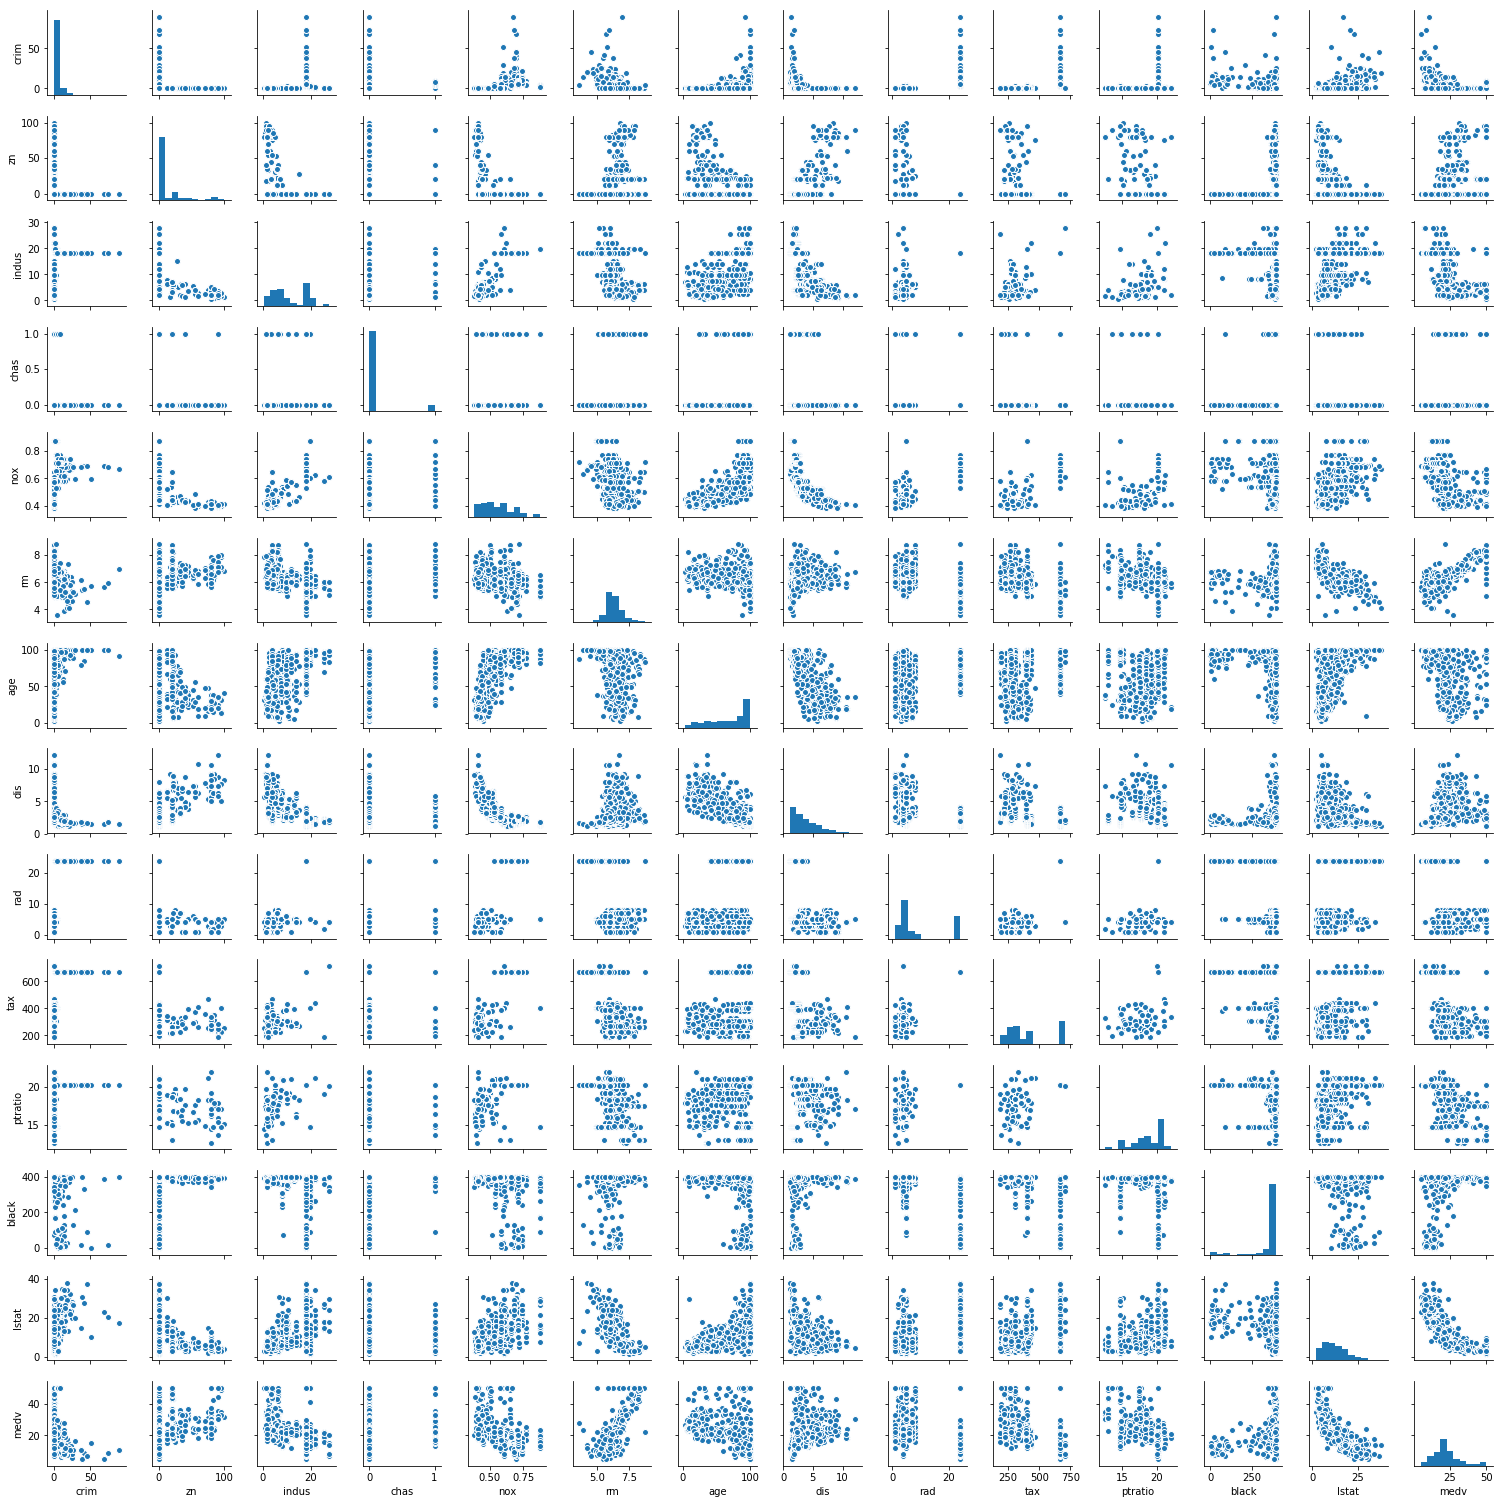

In [8]:
sns.pairplot(df, size = 1.5)

## Since we necessarily do not have to study everything, we just pick out some columns and decide to study them

In [37]:
col_study = ['zn', 'indus', 'nox', 'rm', 'medv']

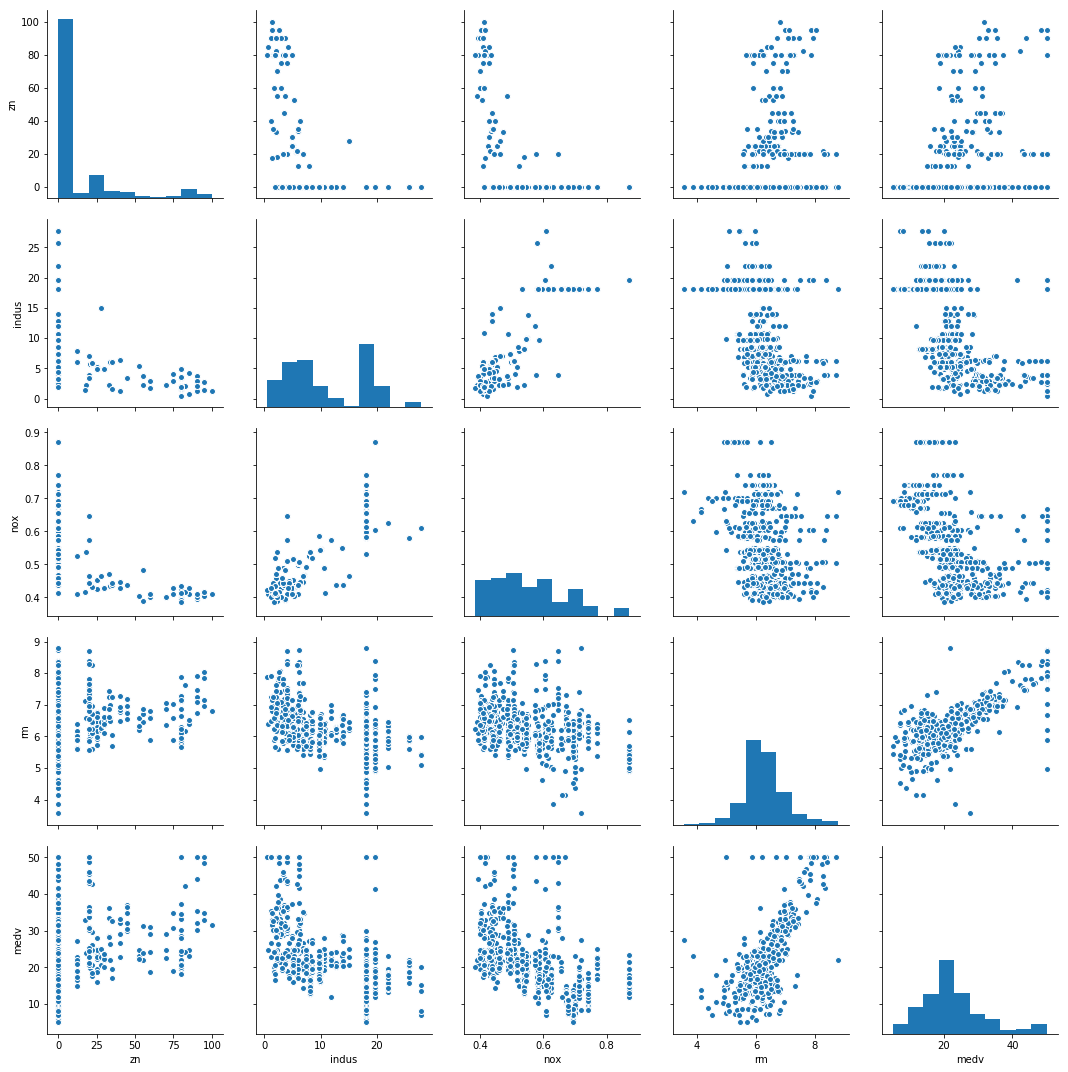

In [38]:
sns.pairplot(df[col_study], size = 3.0)

In [39]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [40]:
col_study_2 = ['crim','ptratio', 'black', 'lstat', 'medv']

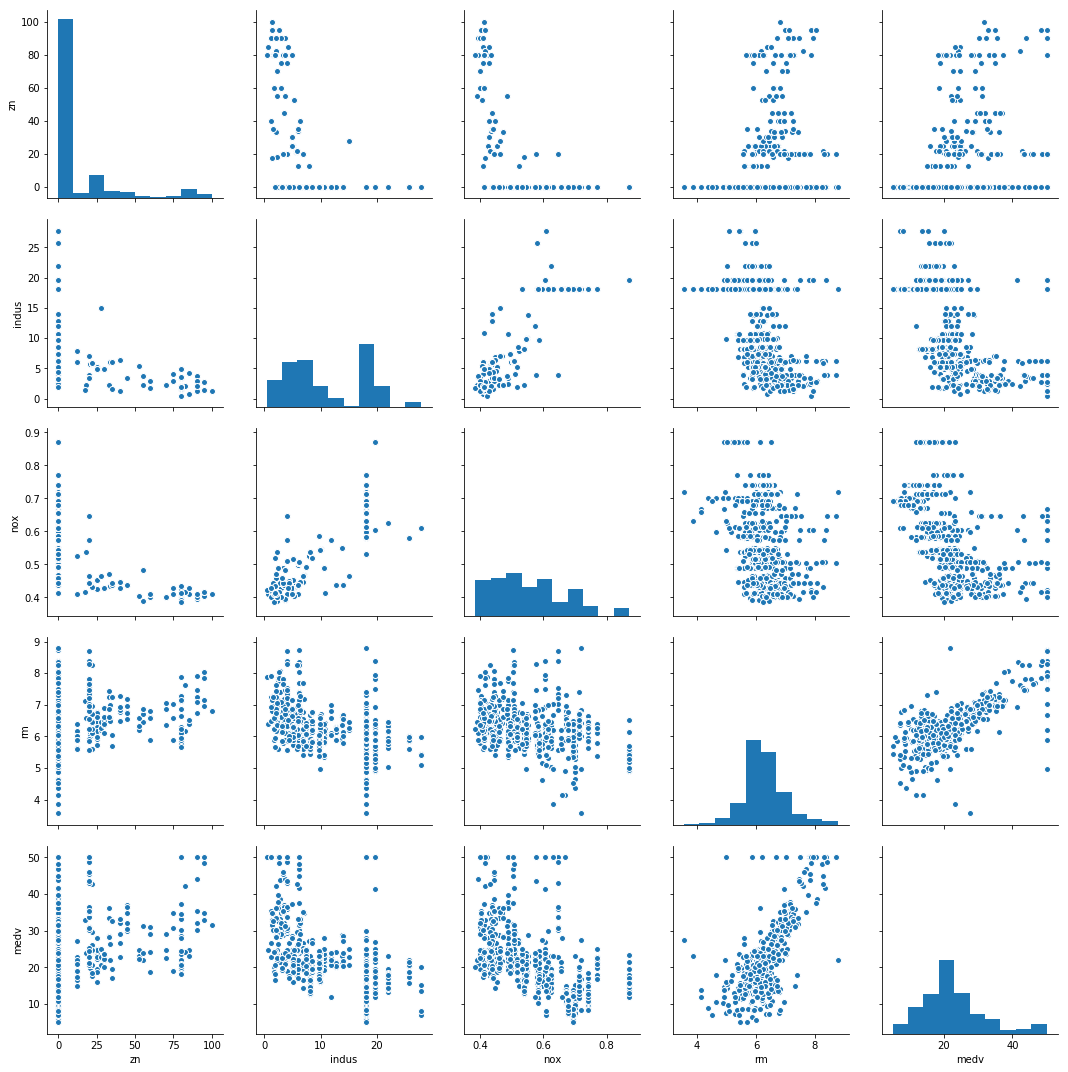

In [41]:
sns.pairplot(df[col_study], size = 3.0)

# Correlation Analysis and Feature Selection

In [42]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# To plot a heat map which can make visualization more appealing

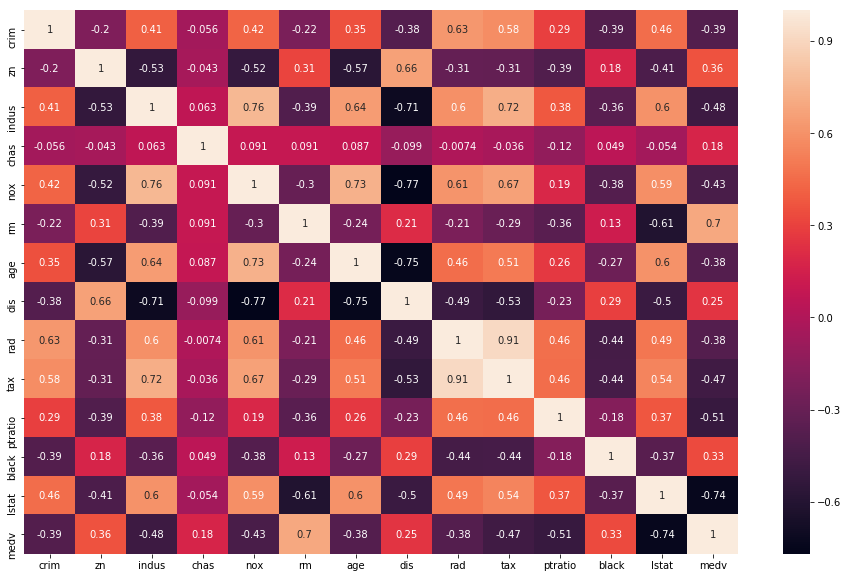

In [53]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot = True)

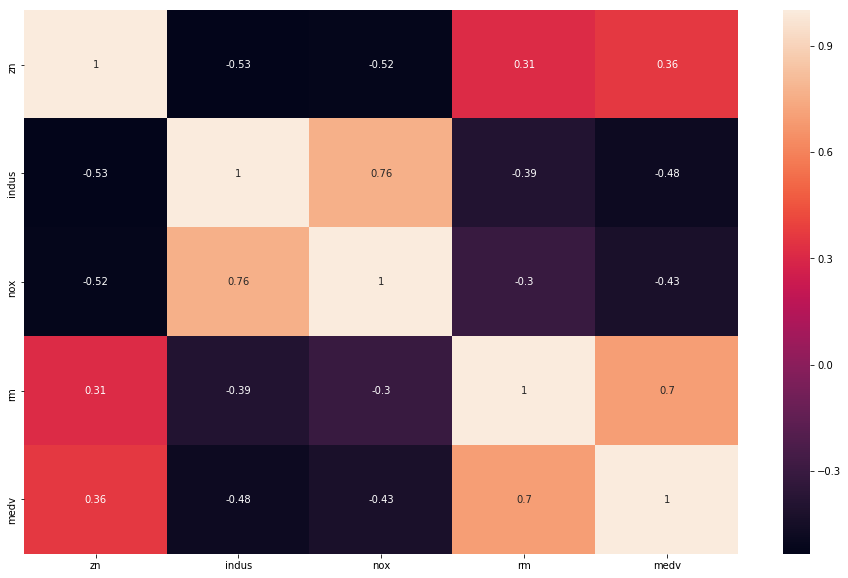

In [54]:
#Performing a study of four variables against the medium value

plt.figure(figsize=(16,10))
sns.heatmap(df[col_study].corr(), annot = True)

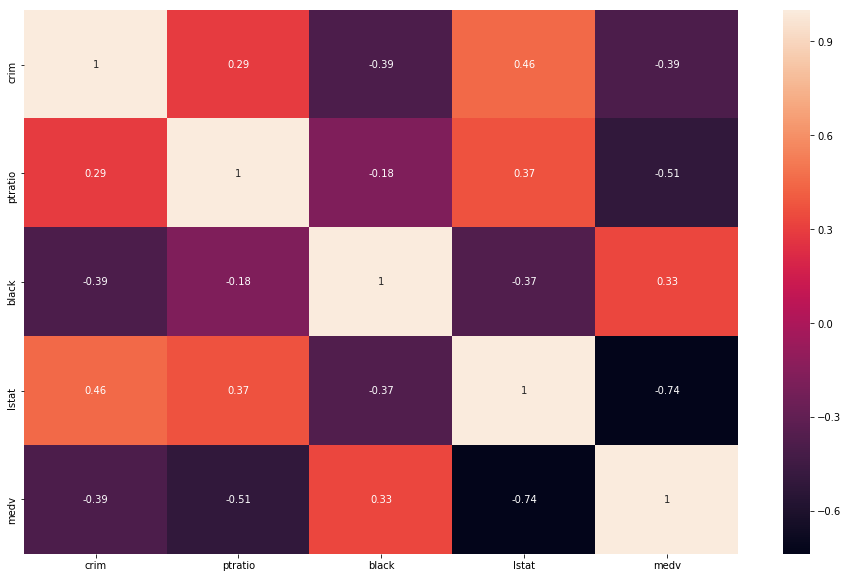

In [55]:
plt.figure(figsize=(16,10))
sns.heatmap(df[col_study_2].corr(), annot = True)

#### From the heatmaps and the pairplots it is easy to see the feature that has the highest correlation with the medium housing value and that is the room per dwelling therefore i will go ahead to use that in building a linear regression model, this means that I am using only one variable to estimate the house price--Univariate Modelling

# Linear Regression with SciKit-Learn

In [56]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [58]:
X = df['rm'].values.reshape(-1, 1)

In [60]:
y = df['medv']

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model = LinearRegression()

In [63]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
model.coef_

array([9.10210898])

In [65]:
model.intercept_

-34.670620776438554

Text(0,0.5,'median value of owner occupied homes in $1000s')

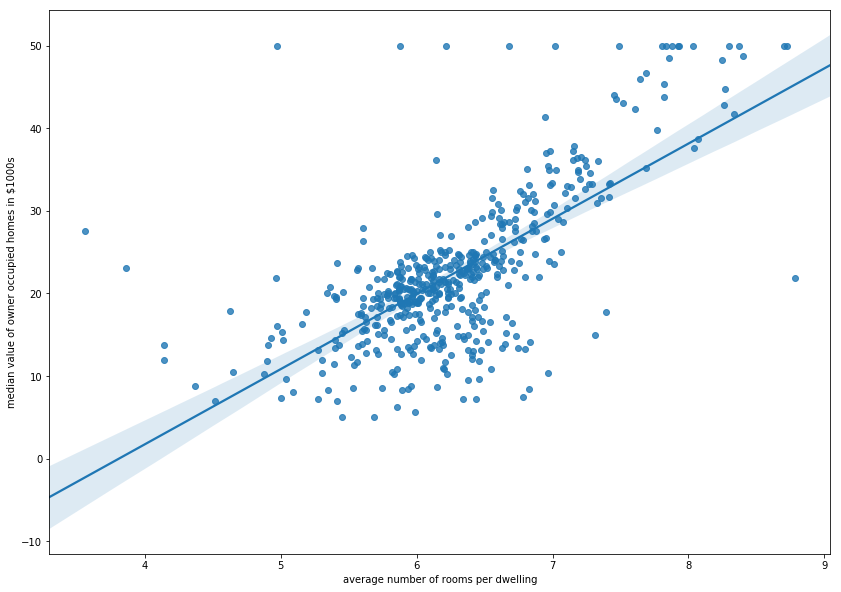

In [73]:
plt.figure(figsize = (14,10))
sns.regplot(X,y)
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("median value of owner occupied homes in $1000s")

C:\Users\DELL\Anaconda3\envs\Train\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL\Anaconda3\envs\Train\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


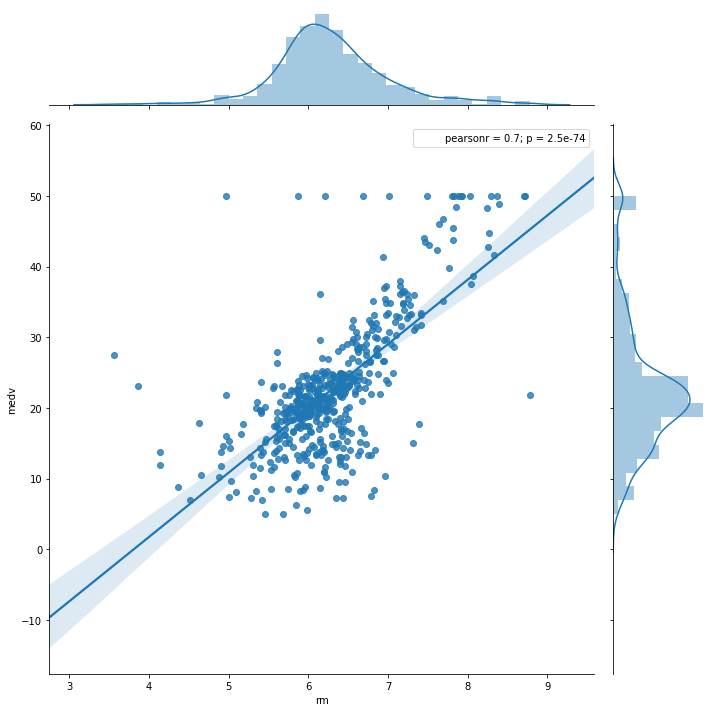

In [78]:
sns.jointplot(x='rm', y='medv', data=df, kind='reg', size=10);

### Modelling using another single feature (lstat), which is the lower status of the population 

In [79]:
X = df['lstat'].values.reshape(-1,1)
y = df['medv'].values

In [80]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'median vlaue of owner occupied homes in $1000s')

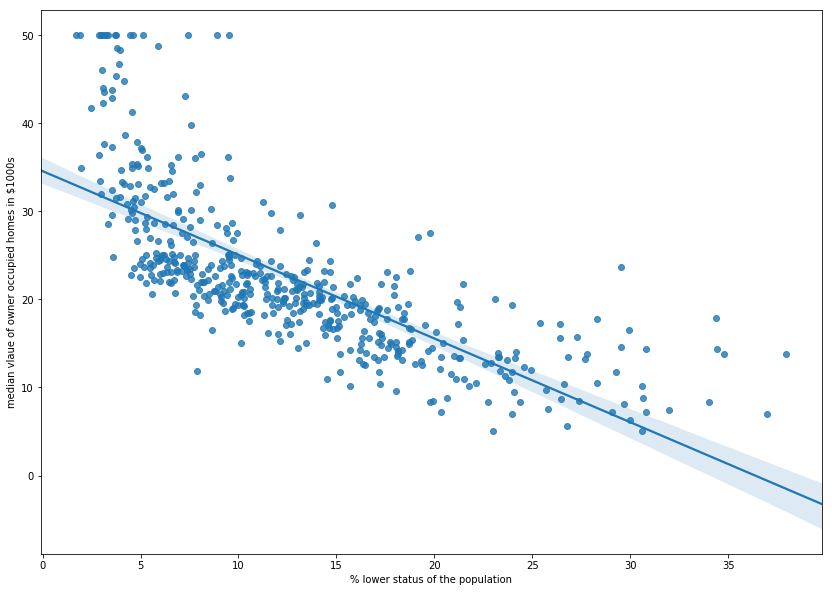

In [92]:
plt.figure(figsize = (14, 10))
sns.regplot(X,y)
plt.xlabel("% lower status of the population")
plt.ylabel("median vlaue of owner occupied homes in $1000s")

### There are lots of features from this plot showing that linear regression isn't the best tool to analyze and model this data

** Capping of this data at the half a million mark **

** Lack of observation ** 

** Non-linearity of some parts of the dataset **

C:\Users\DELL\Anaconda3\envs\Train\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL\Anaconda3\envs\Train\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


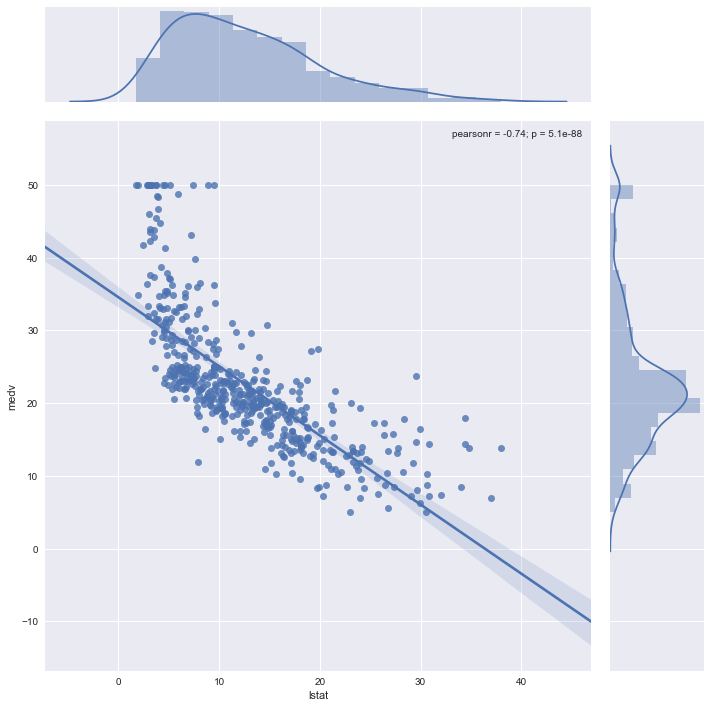

In [117]:
sns.jointplot(x='lstat', y='medv', data=df, kind='reg', size =10)

### Analyzing individual features makes it more clear what your dataset holds within them and helps you choose the right tool

-----------

## ROBUST REGRESSION

## RANdom SAmple Consensus (RANSAC) Algorithm

### Each iteration performs a number of steps which include:

1.) Select min_samples from the original data and check whether the set of data is valid(see is_data_valid)

2.) Fit a model to the random subset(base_estimator.fit) and check whether the estimated model is valid(see is_model_valid)

3.) Classify each data as inlier or outlier by calculating the residual to the estimated mode(base_estimator.predict(X)-y) all data samples with absolute residuals smaller than the residual threshhold are considered as inliers

4.) Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of ouliers, it is only considered as the best model if it has a better score.
    


In [94]:
X = df['rm'].values.reshape(-1,1)
y = df['medv']

In [95]:
from sklearn.linear_model import RANSACRegressor

In [96]:
rs = RANSACRegressor()

In [97]:
rs.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [98]:
inlier_mask = rs.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [99]:
line_X = np.arange(3,10,1)
line_y_rs = rs.predict(line_X.reshape(-1,1))

Text(0,0.5,'median value of owner occupied homw in $1000s')

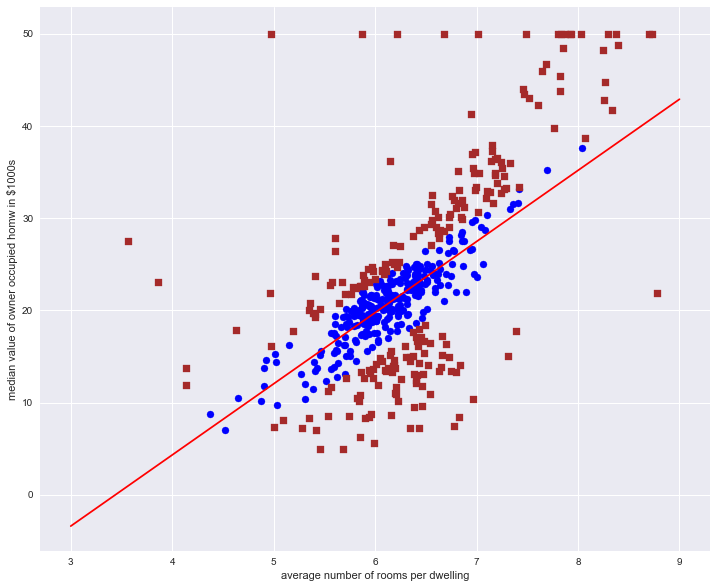

In [100]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(X[inlier_mask], y[inlier_mask], label = 'inliers', c= 'blue', marker ='o' )
plt.scatter(X[outlier_mask], y[outlier_mask], label = 'outliers', c='brown', marker='s')
plt.plot(line_X, line_y_rs, c='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('median value of owner occupied homw in $1000s')


## Performing the same robust regression using another feature ( the lower status of the population in percentage which is a feature in our dataset)

In [101]:
X = df['lstat'].values.reshape(-1,1)
y = df['medv']

In [102]:
rs.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [103]:
inlier_mask = rs.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [104]:
line_X=np.arange(0,40,1)
line_y_rs= rs.predict((line_X).reshape(-1,1))

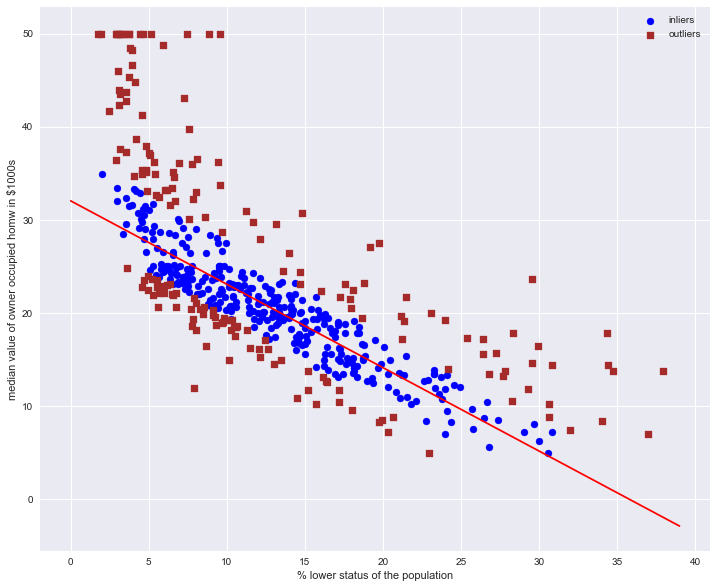

In [105]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(X[inlier_mask], y[inlier_mask], label = 'inliers', c= 'blue', marker ='o' )
plt.scatter(X[outlier_mask], y[outlier_mask], label = 'outliers', c='brown', marker='s')
plt.plot(line_X, line_y_rs, c='red')
plt.xlabel('% lower status of the population')
plt.ylabel('median value of owner occupied homw in $1000s')
plt.legend(loc=1)

## Performance Evaluation Of Regression Model

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X = df.iloc[:, :-1].values

In [109]:
y = df['medv'].values

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [112]:
lr = LinearRegression()

In [113]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [114]:
y_train_pred = lr.predict(X_train)

In [115]:
y_test_pred = lr.predict(X_test)

----------------------------------------------------

# Method 1 : Residual Method

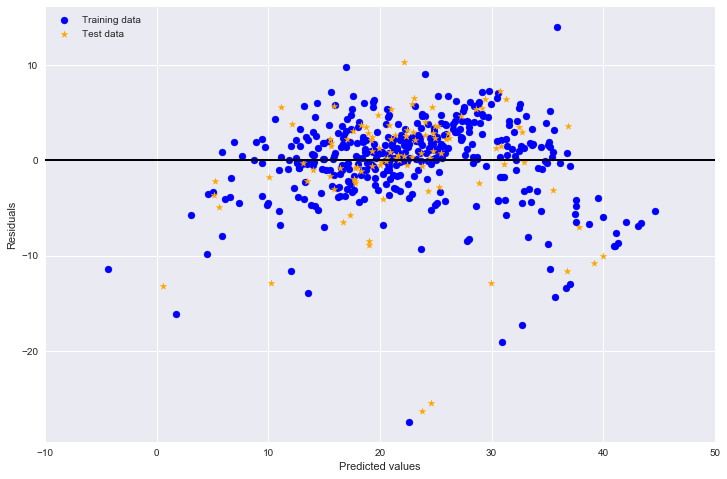

In [116]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

# Method 2: Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [120]:
from sklearn.metrics import mean_squared_error as mse

In [121]:
mse (y_train, y_train_pred)

19.32647020358573

In [123]:
mse(y_test, y_test_pred)

33.448979997676375

-------------

# Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [125]:
from sklearn.metrics import r2_score

In [126]:
r2_score(y_train, y_train_pred)

0.7730135569264233

In [127]:
r2_score(y_test, y_test_pred)

0.5892223849182527